### Lab 3 - Prior and Posterior predictive distributions

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Modeling prior predictive distribution

Because prior predictive distribution does not use data it can often be realized just using random number generators. 

1. Create a Stan model, which will consist of only ```generated quantites``` block.
2. In this block define integer variable ```N``` for number of trials equal to 50, integer variable ```y``` for number of successes and real ```p``` for probability of allergic reaction. Remember to use necessary constraints.
3. Assign a prior for  ```p``` (appropriate random number generator) that will represent our knowledge about typical cases. You can do it either analytically or by using simulations. 
4. Sample from binomial distribution, that will use ```N``` and sampled ```p``` to generate number of allergic reactions ```y```.
5. Generate 1000 samples (pair of ```p``` an ```y```) by calling appropriate method in ```cmdstanpy```. Remeber to set ```fixed_param=True```.
6. Compute ratio of allergic reactions for each sample and create a histogram.
7. Verify if mean of the ratio is consistent with prior knowledge, otherwise modify prior parameters. Describe your reasoning in the report. 

In [6]:
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(fixed_param=True,
                           iter_sampling=1000,
                           iter_warmup=0, 
                           chains = 1,
                           adapt_engaged=False)
df = samples.draws_pd()
df.describe()

09:15:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

09:15:20 - cmdstanpy - INFO - CmdStan done processing.


,chain__,iter__,draw__,lp__,accept_stat__,N,y,p
count,1000.0,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.000000,1000.000000
mean,1.0,500.500000,500.500000,0.0,0.0,50.0,9.841000,0.197061
std,0.0,288.819436,288.819436,0.0,0.0,0.0,3.418392,0.039571
min,1.0,1.000000,1.000000,0.0,0.0,50.0,1.000000,0.078434
25%,1.0,250.750000,250.750000,0.0,0.0,50.0,7.000000,0.170958
50%,1.0,500.500000,500.500000,0.0,0.0,50.0,10.000000,0.196842
75%,1.0,750.250000,750.250000,0.0,0.0,50.0,12.000000,0.222172
max,1.0,1000.000000,1000.000000,0.0,0.0,50.0,21.000000,0.340819


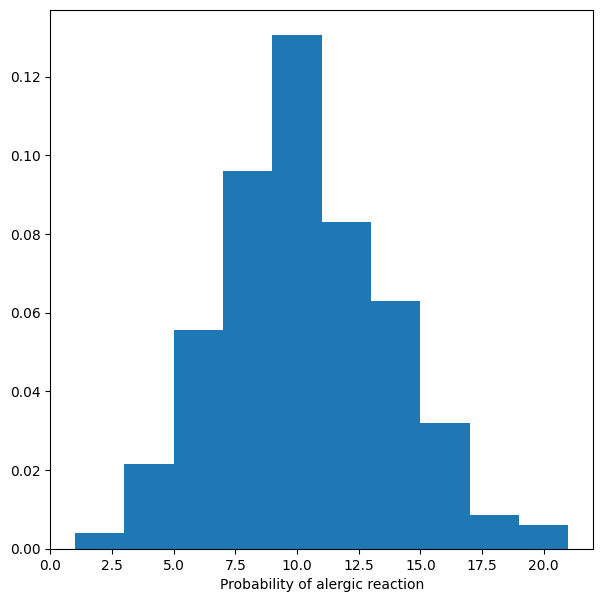

Mean of ratio: 0.19682000000000005


In [7]:
plt.figure(figsize=(7, 7))
plt.hist(df["y"] ,density=True)
plt.gca().set_xlabel("Probability of alergic reaction")
plt.show()

df["y_prob"] = df["y"] / df["N"]
mean = df["y_prob"].mean()
print(f"Mean of ratio: {mean}")

## Modeling posterior and posterior predictive distribution

1. Create a Stan model in which:
   - ```N``` and ```y``` are appropriately defined in the ```data``` block.
   - ```p``` is defined in the parameters block. 
   - binomial likelihood and prior (selected using prior predictive distribution) are defined in the model block.
   - new integer variable ```y_pred``` in the generated quantities block. 
   - sample ```y_pred``` using values of parameter ```p``` and input variable ```N```
2. Generate default number of samples from appropriate method in ```cmdstanpy```.
3. Compute ratio of predicted allergic reactions for each sample and create a histogram.
4. Compute the expected value and 94% density interval of the predicted ratio, compare it with expected value and 94% density interval of parameter ```p```. Use ```arviz``` package.
5. Compute the probability that ratio is lower than the average probability from traditional vaccines (count the number of simulated ratios that are smaller).

In [8]:
gen_quant2 = CmdStanModel(stan_file='code_2.stan')

samples2 = gen_quant2.sample(data={'N':50,'y':10})

df2 = samples2.draws_pd()
df2.describe()

09:20:58 - cmdstanpy - INFO - compiling stan file /workspace/code_2.stan to exe file /workspace/code_2
09:21:13 - cmdstanpy - INFO - compiled model executable: /workspace/code_2
09:21:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:21:14 - cmdstanpy - INFO - CmdStan done processing.


,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000
mean,2.500000,500.500000,2000.500000,-27.345993,0.929246,0.897964,1.536000,2.834500,0.0,27.828934,0.201287,10.021250
std,1.118174,288.711081,1154.844867,0.709945,0.121936,0.158481,0.681043,1.763062,0.0,1.008799,0.026149,3.131972
min,1.000000,1.000000,1.000000,-33.485300,0.004634,0.662316,1.000000,1.000000,0.0,26.847900,0.110473,1.000000
25%,1.750000,250.750000,1000.750000,-27.517250,0.913156,0.801796,1.000000,1.000000,0.0,27.133250,0.183431,8.000000
50%,2.500000,500.500000,2000.500000,-27.079900,0.977405,0.929720,1.000000,3.000000,0.0,27.519250,0.201022,10.000000
75%,3.250000,750.250000,3000.250000,-26.900100,0.999957,1.025888,2.000000,3.000000,0.0,28.176300,0.219200,12.000000
max,4.000000,1000.000000,4000.000000,-26.847800,1.000000,1.070100,3.000000,7.000000,0.0,34.990500,0.295951,23.000000


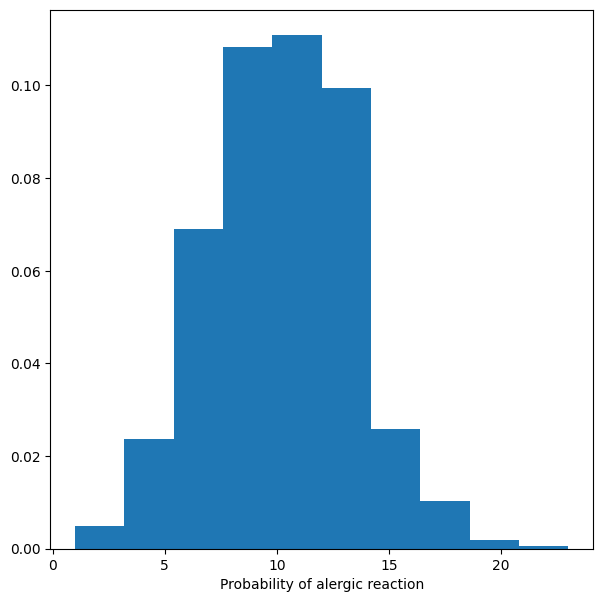

Mean of ratio: 0.20042500000000002


In [9]:
plt.figure(figsize=(7, 7))
plt.hist(df2["y_pred"] ,density=True)
plt.gca().set_xlabel("Probability of alergic reaction")
plt.show()

df2["y_prob"] = df2["y_pred"] / 50
mean = df2["y_prob"].mean()
print(f"Mean of ratio: {mean}")

In [10]:
y_pred_ratio = df2["y_prob"].mean()
y_pred_density_interval = az.hdi(df2["y_prob"].to_numpy(), credible_interval=0.94)

p_ratio = df2["p"].mean()
p_density_interval = az.hdi(df2["p"].to_numpy(), credible_interval=0.94)

ratio_lower_than_avg = np.sum(df2["y_prob"] < 0.2) / len(df2["y_prob"])

print(f"Expected ratio = {y_pred_ratio:.3f}")
print("94% density interval of the predicted ratio = ", y_pred_density_interval)

print(f"Expected value of parameter p = {p_ratio:.3f}")
print("94% density interval of the parameter p = ", p_density_interval)

print(f"Probability that ratio is lower than the average probability = {ratio_lower_than_avg:.3f}")

Expected ratio = 0.200
94% density interval of the predicted ratio =  [0.08 0.3 ]
Expected value of parameter p = 0.201
94% density interval of the parameter p =  [0.155794 0.251251]
Probability that ratio is lower than the average probability = 0.453
